In [1]:
import os,sys,inspect

import pnsolver

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import util
import stencil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def load_pn_solution(filename):
    data = util.load_pn_system(filename)
    staggered = False
    pni = stencil.PNInfo2D( data["order"], staggered )
    domain = pnsolver.Domain( np.array([7.0, 7.0]), data["resolution"], np.array([0.0, 0.0]) )
    data["domain"] = domain
    data["pni"] = pni
    
    x_complex = pni.to_complex(data["x"])

    # contruct radiance field from coefficients
    L = pnsolver.SHEXP( data["order"] )
    for index in range(data["numCoeffs"]):
        (l,m) = pni.lm_index(index)
        sh_index = util.sh_index(l,m)
        offset = pni.getOffset(index)*0.5

        u0 = util.extract_coefficient_field( x_complex, data["resolution"], data["numCoeffs"], index )
        L.setCoefficientField( l, m, pnsolver.VoxelGrid( u0, domain, offset ) )
        #print(u0.dtype)
    data["L"] = L
    return data


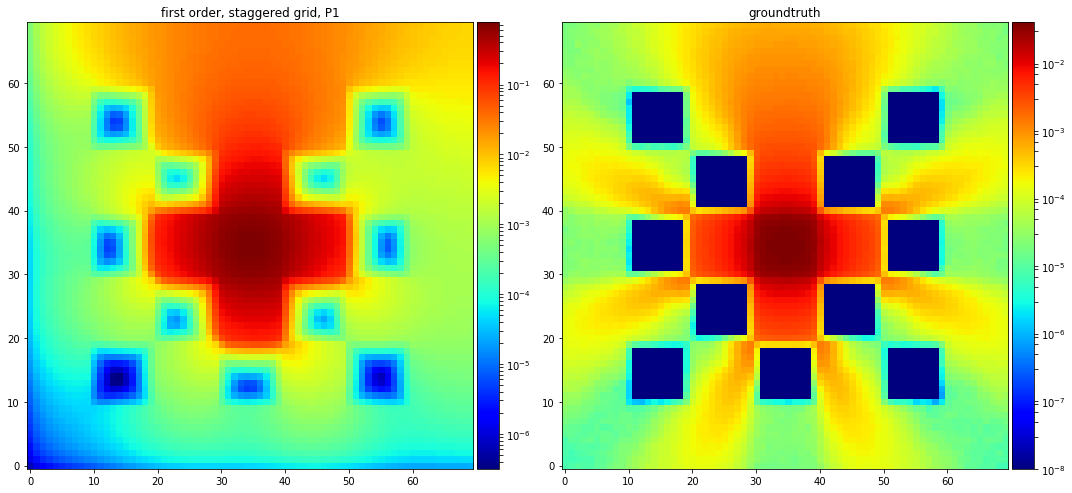

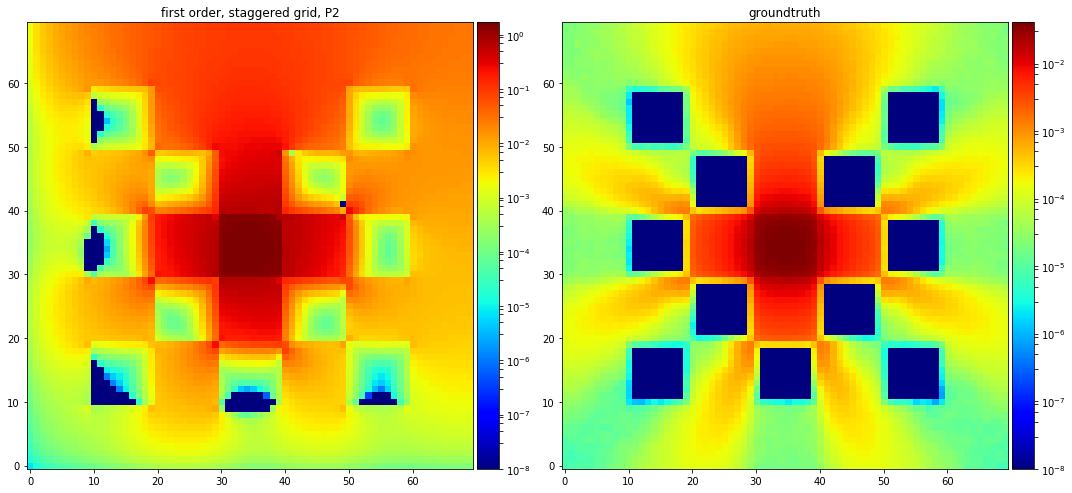

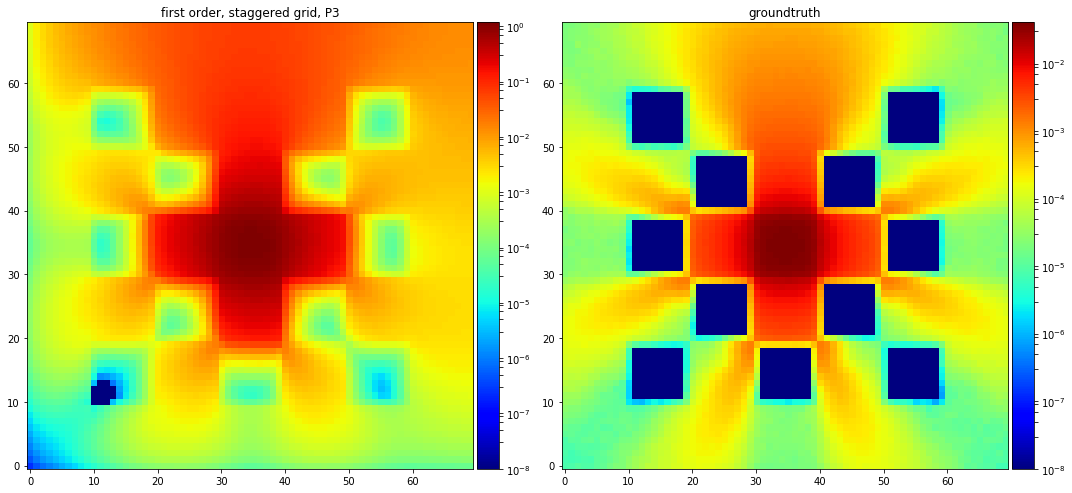

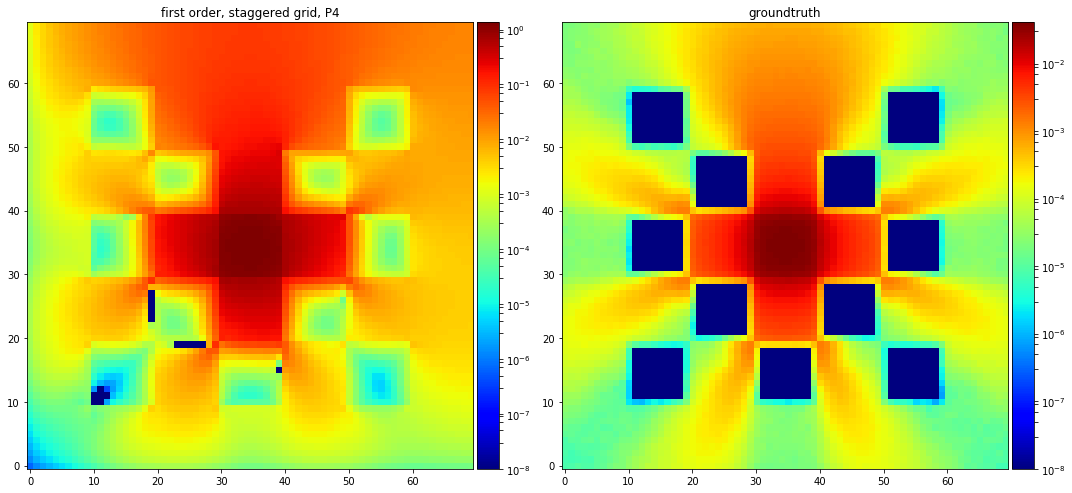

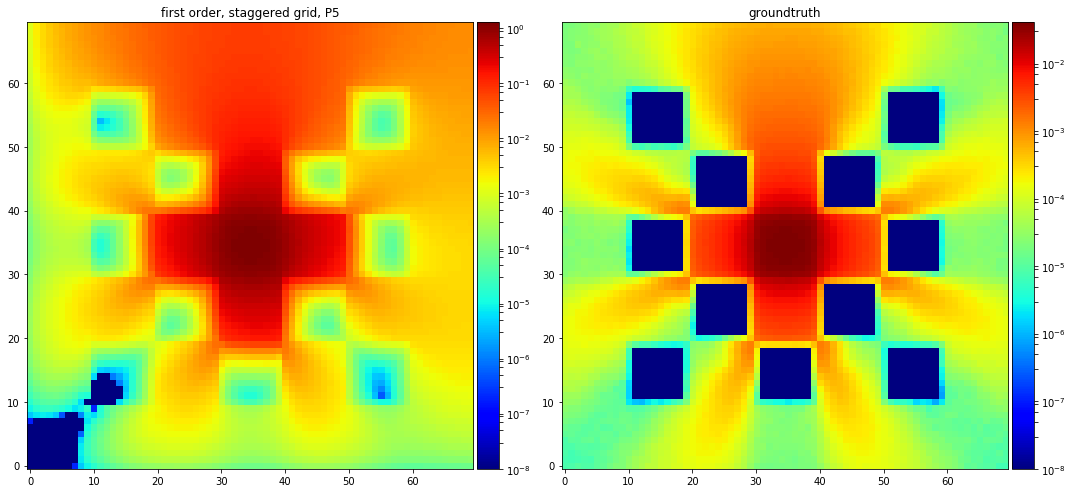

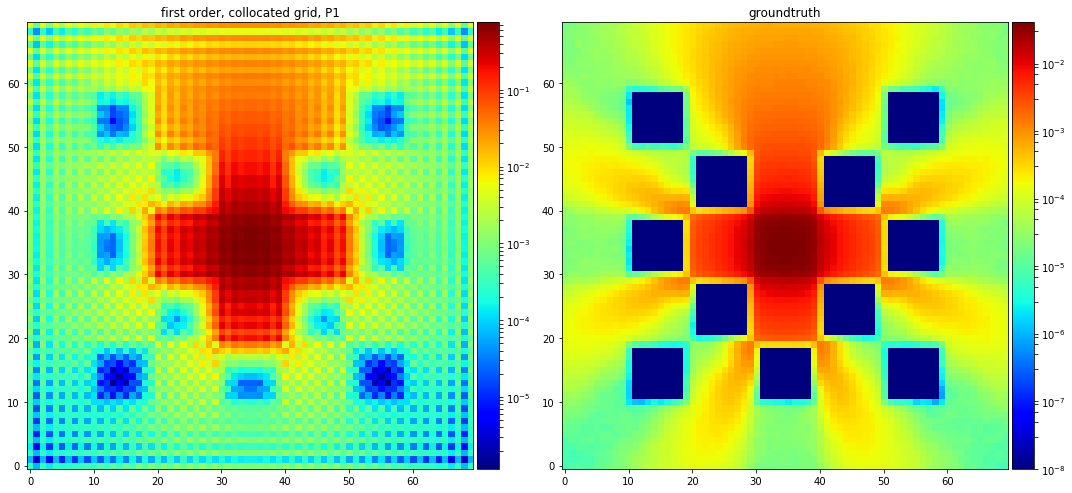

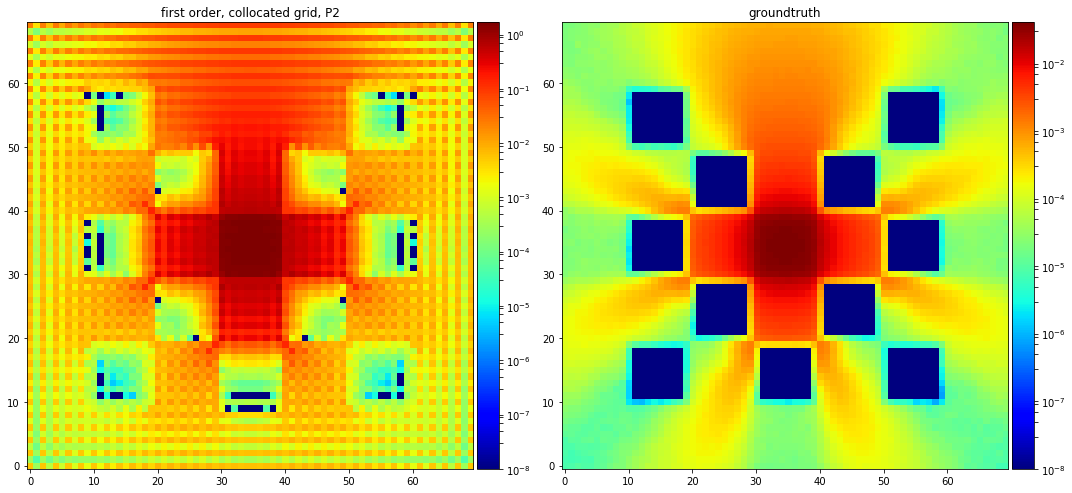

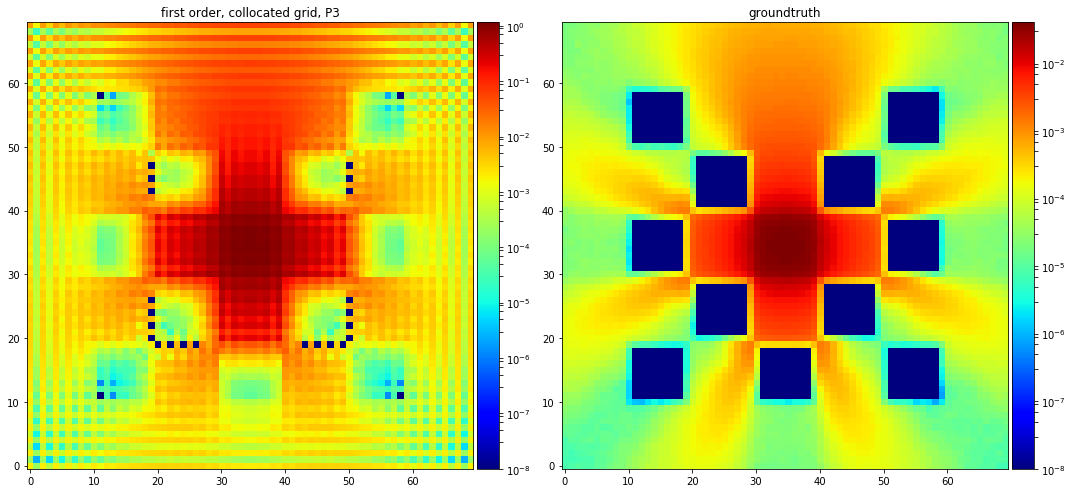

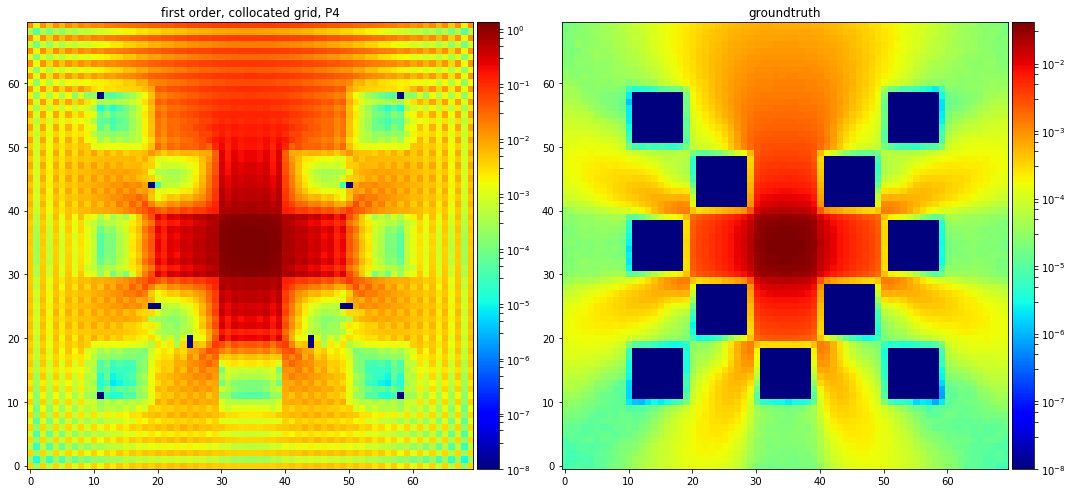

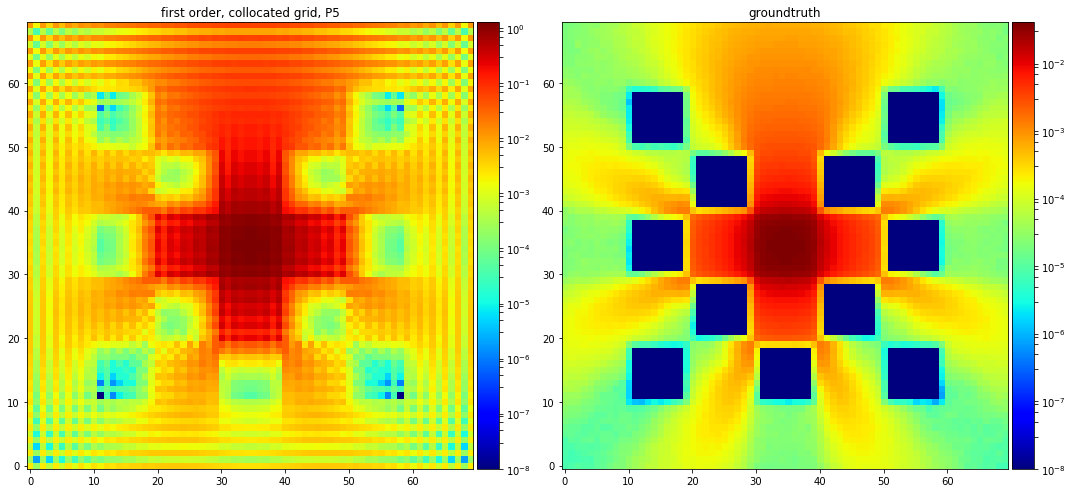

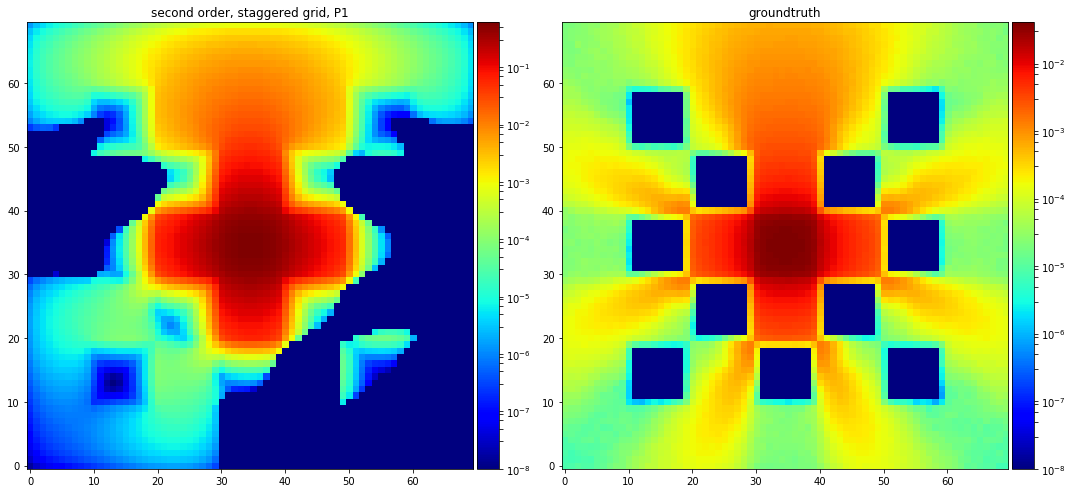

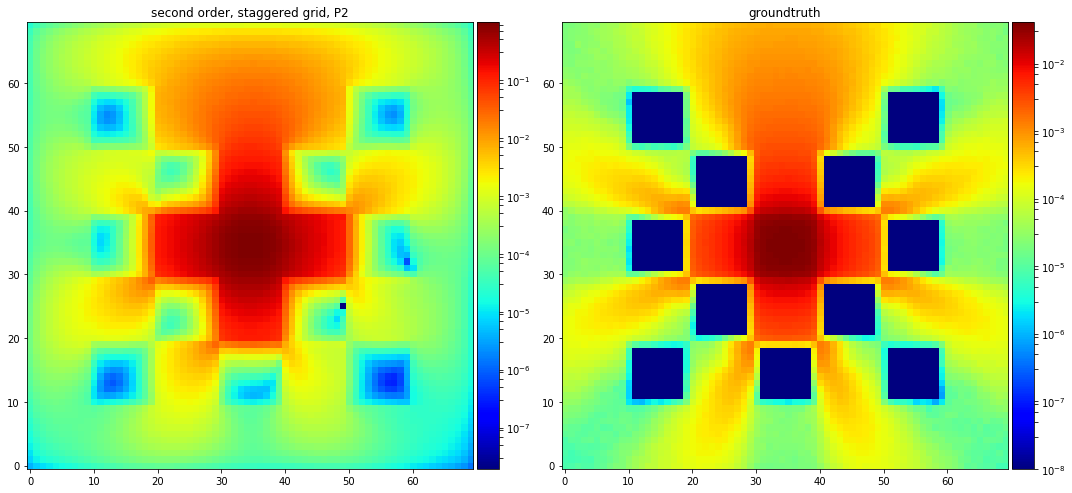

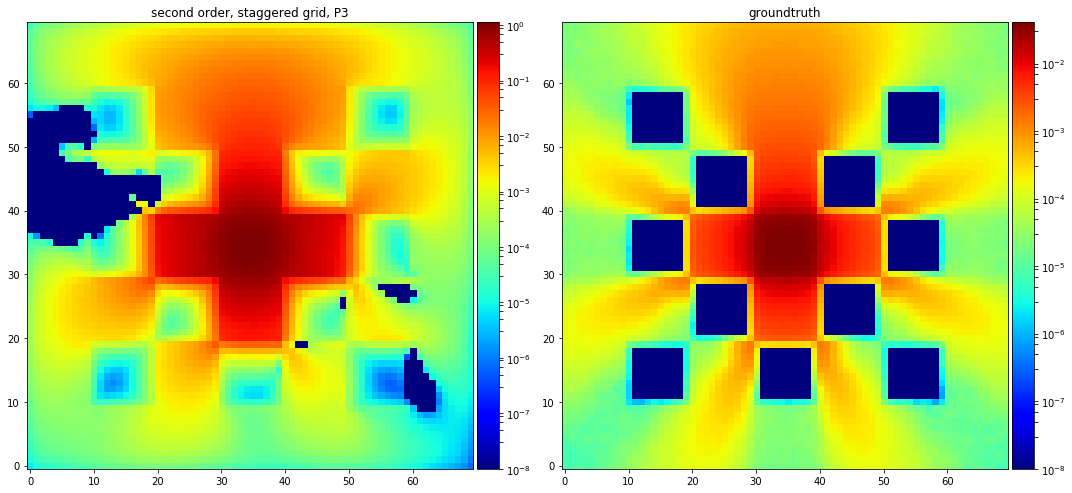

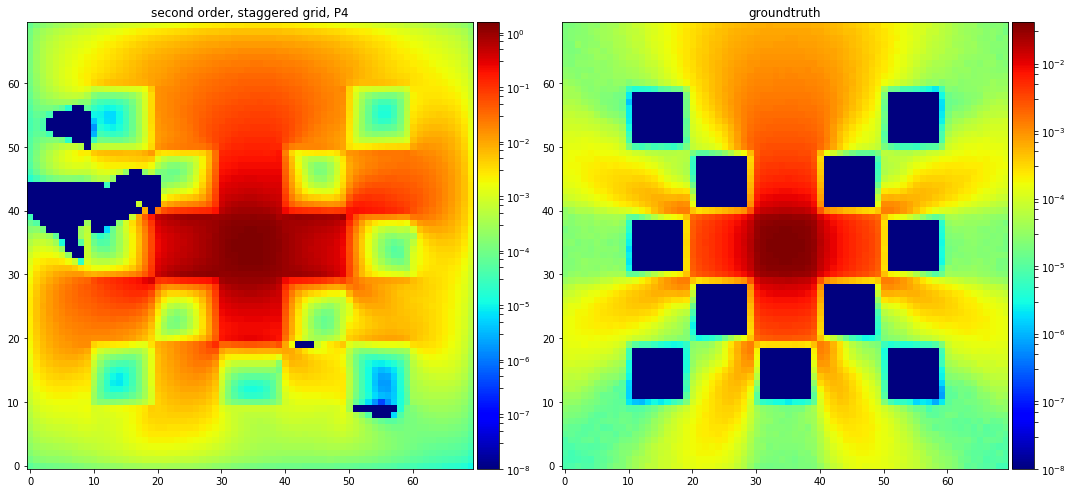

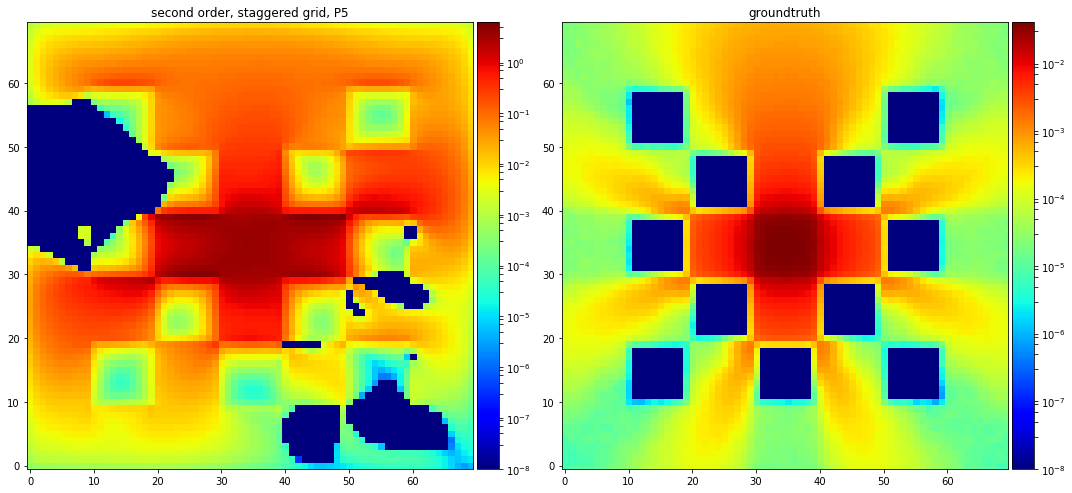

In [3]:
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_groundtruth.mat"
data = util.load_pn_system(filename)
groundtruth_image = data["x"]
groundtruth_image = np.clip(groundtruth_image, 1.0e-8, np.max(groundtruth_image))




maxOrder=5
for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    order = i+1
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_fopn_p{}_sg.mat".format(order)
    
    data = load_pn_solution(dataset_filename)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("first order, staggered grid, P{}".format(order))
    img_view = ax.imshow(u.T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("groundtruth")
    img_view = ax.imshow(groundtruth_image.T, cmap='jet', norm=LogNorm(vmin=np.min(groundtruth_image), vmax=np.max(groundtruth_image)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)
    plt.tight_layout()
    plt.show()
    
for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    order = i+1
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_fopn_p{}_cg.mat".format(order)
    
    data = load_pn_solution(dataset_filename)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("first order, collocated grid, P{}".format(order))
    img_view = ax.imshow(u.T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("groundtruth")
    img_view = ax.imshow(groundtruth_image.T, cmap='jet', norm=LogNorm(vmin=np.min(groundtruth_image), vmax=np.max(groundtruth_image)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)
    plt.tight_layout()
    plt.show()
    
for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    order = i+1
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_p{}_sg.mat".format(order)
    
    data = load_pn_solution(dataset_filename)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("second order, staggered grid, P{}".format(order))
    img_view = ax.imshow(u.T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("groundtruth")
    img_view = ax.imshow(groundtruth_image.T, cmap='jet', norm=LogNorm(vmin=np.min(groundtruth_image), vmax=np.max(groundtruth_image)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)
    plt.tight_layout()
    plt.show()